In [1]:
import os
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
image_dir = 'D:/For Me/3_Dataset/Shrimp/raw/'
save_path = 'D:/For Me/3_Dataset/Shrimp/create'

In [ ]:
def load_image(img_idx):
    img = cv2.imread(os.path.join(image_dir, f"{img_idx}.jpg"))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

In [112]:
def randomcrop(img, size):
    # Crop image
    height, width = size
    x = random.randint(0, img.shape[1] - int(width))
    y = random.randint(0, img.shape[0] - int(height))
    cropped = img[y:y+height, x:x+width]
    
    return cropped

In [113]:
def colorjitter(img, cj_type="b"):
    if cj_type == "b":
        value = np.random.choice(np.array([-50, -40, -30, 30, 40, 50]))
        hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        h, s, v = cv2.split(hsv)
        if value >= 0:
            lim = 255 - value
            v[v > lim] = 255
            v[v <= lim] += value
        else:
            lim = np.absolute(value)
            v[v < lim] = 0
            v[v >= lim] -= np.absolute(value)

        final_hsv = cv2.merge((h, s, v))
        img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
        return img
    
    elif cj_type == "s":
        value = np.random.choice(np.array([-50, -40, -30, 30, 40, 50]))
        hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        h, s, v = cv2.split(hsv)
        if value >= 0:
            lim = 255 - value
            s[s > lim] = 255
            s[s <= lim] += value
        else:
            lim = np.absolute(value)
            s[s < lim] = 0
            s[s >= lim] -= np.absolute(value)

        final_hsv = cv2.merge((h, s, v))
        img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
        return img
    
    elif cj_type == "c":
        brightness = 10
        contrast = random.randint(40, 100)
        dummy = np.int16(img)
        dummy = dummy * (contrast/127+1) - contrast + brightness
        dummy = np.clip(dummy, 0, 255)
        img = np.uint8(dummy)
        return img

In [114]:
def noisy(img, noise_type="gauss"):
    if noise_type == "gauss":
        image=img.copy() 
        mean=0
        st=0.7
        gauss = np.random.normal(mean,st,image.shape)
        gauss = gauss.astype('uint8')
        image = cv2.add(image,gauss)
        return image
    
    elif noise_type == "sp":
        image=img.copy() 
        prob = 0.05
        if len(image.shape) == 2:
            black = 0
            white = 255            
        else:
            colorspace = image.shape[2]
            if colorspace == 3:  # RGB
                black = np.array([0, 0, 0], dtype='uint8')
                white = np.array([255, 255, 255], dtype='uint8')
            else:  # RGBA
                black = np.array([0, 0, 0, 255], dtype='uint8')
                white = np.array([255, 255, 255, 255], dtype='uint8')
        probs = np.random.random(image.shape[:2])
        image[probs < (prob / 2)] = black
        image[probs > 1 - (prob / 2)] = white
        return image

In [115]:
def filters(img, f_type = "blur"):
    if f_type == "blur":
        image=img.copy()
        fsize = 5
        return cv2.blur(image,(fsize,fsize))
    
    elif f_type == "gaussian":
        image=img.copy()
        fsize = 5
        return cv2.GaussianBlur(image, (fsize, fsize), 0)
    
    elif f_type == "median":
        image=img.copy()
        fsize = 5
        return cv2.medianBlur(image, fsize)

In [121]:
def create_image(max_image):
    crop_image_list = []
    for i in range(max_image):
        # random file for crop
        img_idx = random.randint(1, 2)
        img = load_image(img_idx)
        crop_img = randomcrop(img, (600, 600))

        # random modify on/off
        select_modify = random.choice(['on', 'off'])
        if select_modify is 'on':
            # random colorjitter mode
            select_colorjitter = random.choice(['None', 'b', 's', 'c'])
            if select_colorjitter is not 'None':
                crop_img = colorjitter(crop_img, select_colorjitter)

            # random noisy mode
            select_noiosy = random.choice(['None', 'gauss', 'sp'])
            if select_noiosy is not 'None':
                crop_img = noisy(crop_img, select_noiosy)
            
            # random filter mode
            select_filter = random.choice(['None', 'blur', 'gaussian', 'median'])
            if select_filter is not 'None':
                crop_img = filters(crop_img, select_filter)

        crop_image_list.append({
            'index': img_idx,
            'crop_image': crop_img
        })
    
    return crop_image_list

In [122]:
def save_image(save_path, image_list):
    for idx in range(len(image_list)):
        plt.imsave(os.path.join(save_path, f"{idx}.jpg"), image_list[idx]['crop_image'])

In [123]:
crop_image_list = create_image(500)

In [126]:
save_image(save_path, crop_image_list)

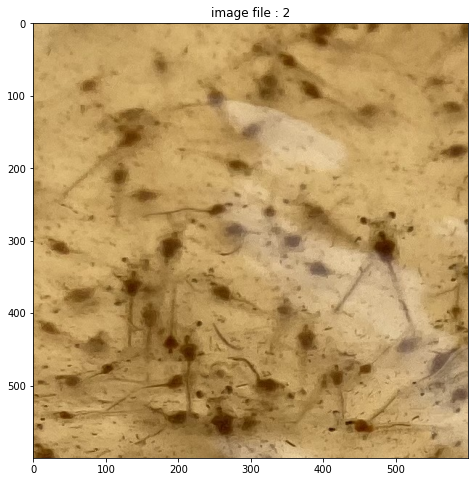

In [128]:
# explore create data
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.imshow(crop_image_list[1]['crop_image'])
ax.set_title(f"image file : {crop_image_list[1]['index']}")
plt.show()